<a href="https://colab.research.google.com/github/tech-dhawal-03/cognifyzInternAchent/blob/main/level1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Descriptive statistics for numerical columns:

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
2

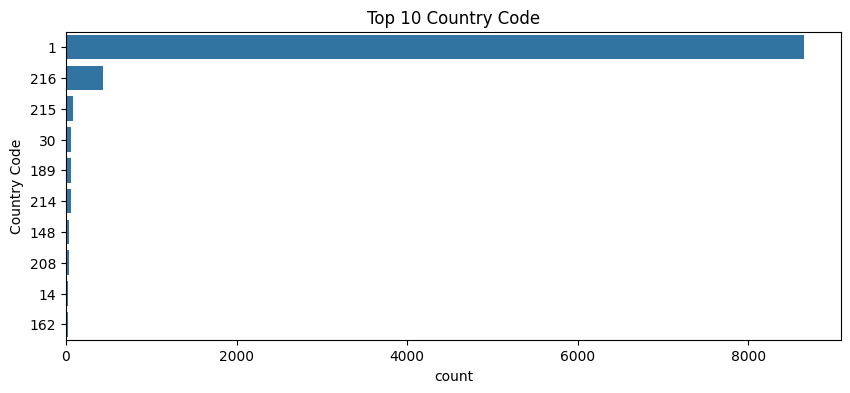


Value counts for City:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


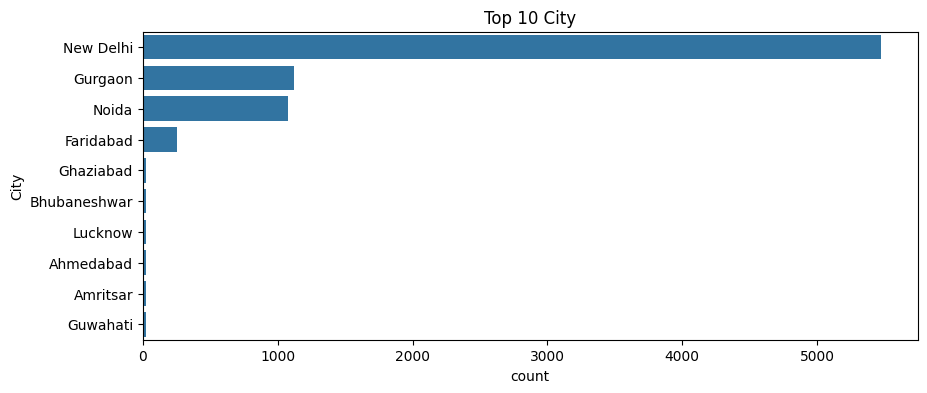


Value counts for Cuisines:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


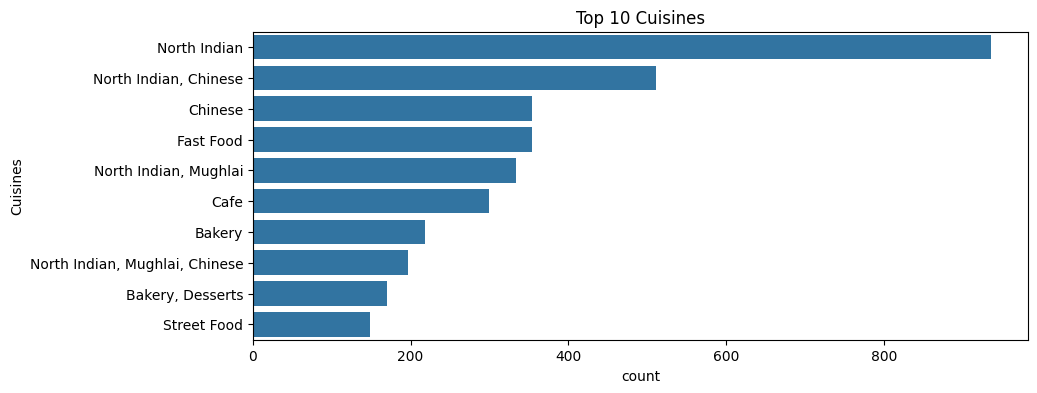


Top 10 Cuisines:
 North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


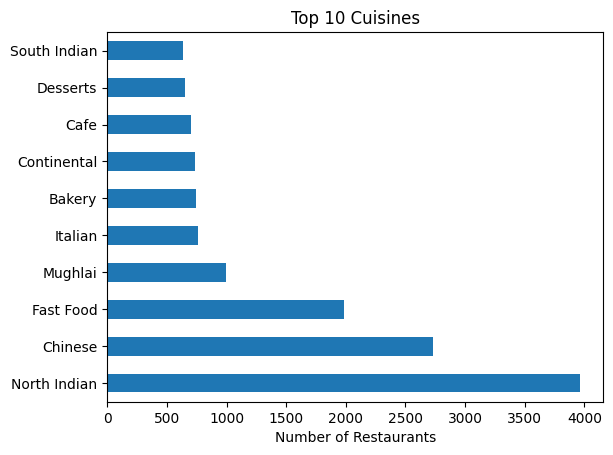


Top 10 Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


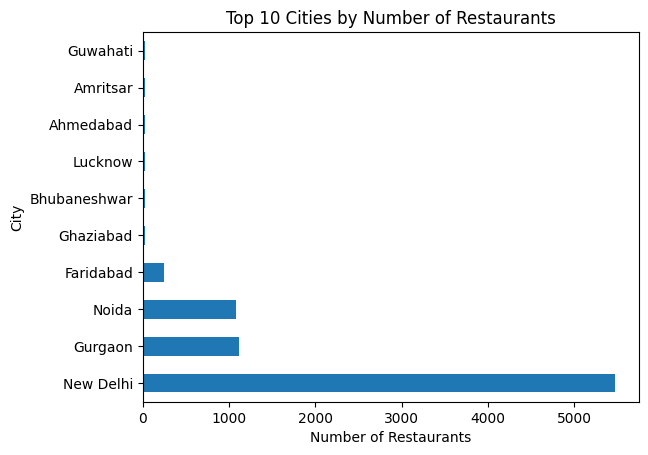

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Dataset .csv')
df.head()

# -------------------------------
# 1. Basic Statistical Measures
# -------------------------------
print("Descriptive statistics for numerical columns:\n")
print(df.describe())

# Additional stats
print("\nStandard Deviation:\n", df.std(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))

# -------------------------------
# 2. Distribution of Categorical Variables
# -------------------------------
categorical_columns = ['Country Code', 'City', 'Cuisines']

for col in categorical_columns:
    print(f"\nValue counts for {col}:\n", df[col].value_counts().head(10))  # top 10 only
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top 10 {col}")
    plt.show()

# -------------------------------
# 3. Top Cuisines and Cities by Restaurant Count
# -------------------------------

# If multiple cuisines are in one cell, split them
cuisine_split = df['Cuisines'].dropna().str.split(', ')
cuisine_flat = pd.Series([item for sublist in cuisine_split for item in sublist])
top_cuisines = cuisine_flat.value_counts().head(10)

print("\nTop 10 Cuisines:\n", top_cuisines)
top_cuisines.plot(kind='barh', title='Top 10 Cuisines')
plt.xlabel("Number of Restaurants")
plt.show()

# Top Cities
top_cities = df['City'].value_counts().head(10)
print("\nTop 10 Cities:\n", top_cities)
top_cities.plot(kind='barh', title='Top 10 Cities by Number of Restaurants')
plt.xlabel("Number of Restaurants")
plt.show()
